In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


airline = pd.read_csv("./customer_airways_data.csv", encoding="iso-8859-1")



#### Analizaremos si hay canales de venta que atraen mas a viajeros en solitario o en grupo



In [4]:
airline.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [132]:
def passengers(value):
  if value>1: 
    return "group"
  return "lonely"


airline["type_traveler"] = airline.num_passengers.apply(passengers)

df = airline.groupby("sales_channel")["type_traveler"].value_counts().to_frame().rename(columns={"type_traveler": "quantity"})

df_passengers = df.reset_index()

df_passengers



,sales_channel,type_traveler,quantity
0,Internet,lonely,27794
1,Internet,group,16588
2,Mobile,lonely,3558
3,Mobile,group,2060


In [171]:
df_mobile = df_passengers.loc[2:]
df_internet = df_passengers.loc[:1]


Text(0.5, 1.0, 'Travelers selecting internet')

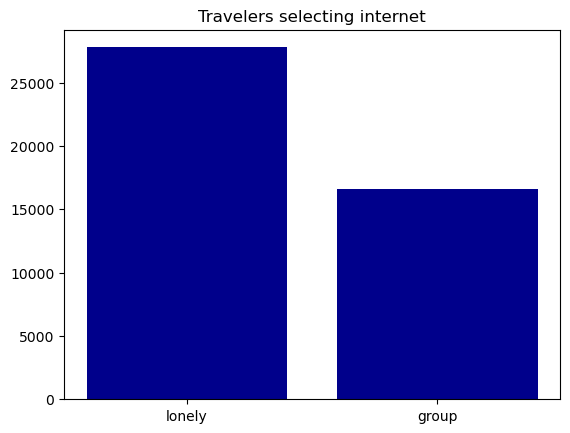

In [172]:
plt.bar(df_internet["type_traveler"], df_internet["quantity"], color="darkblue")
plt.title("Travelers selecting internet")

Text(0.5, 1.0, 'Travelers selecting mobile')

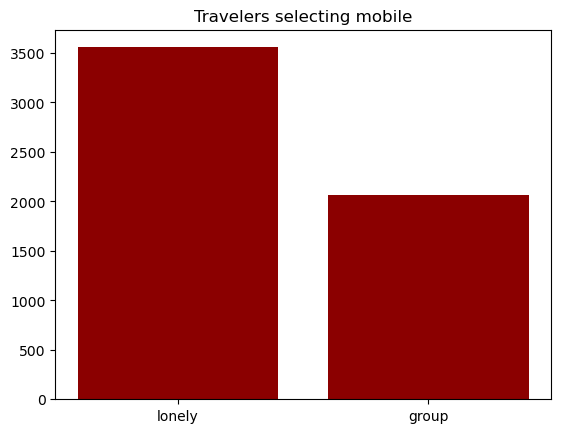

In [173]:
plt.bar(df_mobile["type_traveler"], df_mobile["quantity"], color="darkred")
plt.title("Travelers selecting mobile")

##### Observamos una tendencia similar en ambos gráficos: una mayor cantidad de viajeros solitarios realizan reservas. Sin embargo, se aprecia una diferencia clara en cuanto al canal de venta elegido, con una marcada preferencia por Internet.

##### Si bien la mayoría de las personas posee un teléfono móvil (a diferencia de una PC), podría ser beneficioso para la empresa generar un incentivo para las reservas realizadas a través de este medio.

##### Esta sugerencia se basa en la tendencia observada en el set de datos, aunque no se cuenta con información específica sobre la existencia de tales incentivos, su implementación podría resultar positiva.

##### Detallamos algunos argumentos que apoyan esta sugerencia:

+ Mayor accesibilidad: Los teléfonos móviles facilitan la realización de reservas en cualquier momento y lugar.

+ Comodidad: El proceso de reserva a través de un dispositivo móvil suele ser más rápido y sencillo que hacerlo en una PC.

+ Personalización: Las aplicaciones móviles pueden ofrecer una experiencia personalizada a los usuarios, lo que puede aumentar la satisfacción del cliente.

